<a href="https://colab.research.google.com/github/Nayr91/Codecademy/blob/master/Airline_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
flight.coach_price.describe()
# max, min and mean (avg) prices below. $500 wouldn't be a good price as it is ~$120.00 above the mean price and in the upper 25% quartile.

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [12]:
## Task 2
flight[flight.hours == 8].coach_price.describe()
#min $170.77, max $593.64, mean $431.83. A $500.00 ticket is definitely more reasonable then the data sets average, however it is still in the upper quartile so not completely reasonable.

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

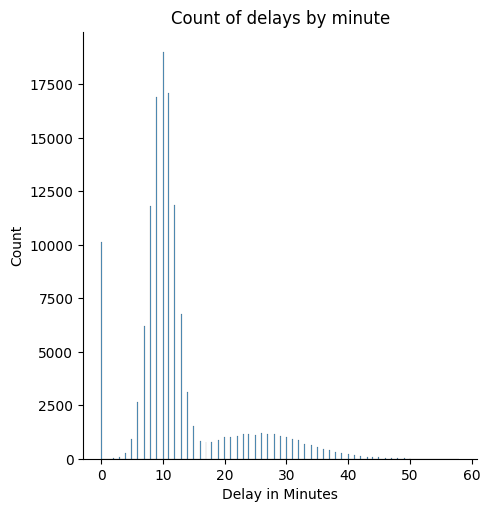

<Figure size 640x480 with 0 Axes>

In [13]:
## Task 3
sns.displot(flight[flight.delay < 100].delay)
plt.xlabel('Delay in Minutes')
plt.title('Count of delays by minute')
plt.show()
plt.clf()
# most frequent delay seems to be around the 10 minute mark


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

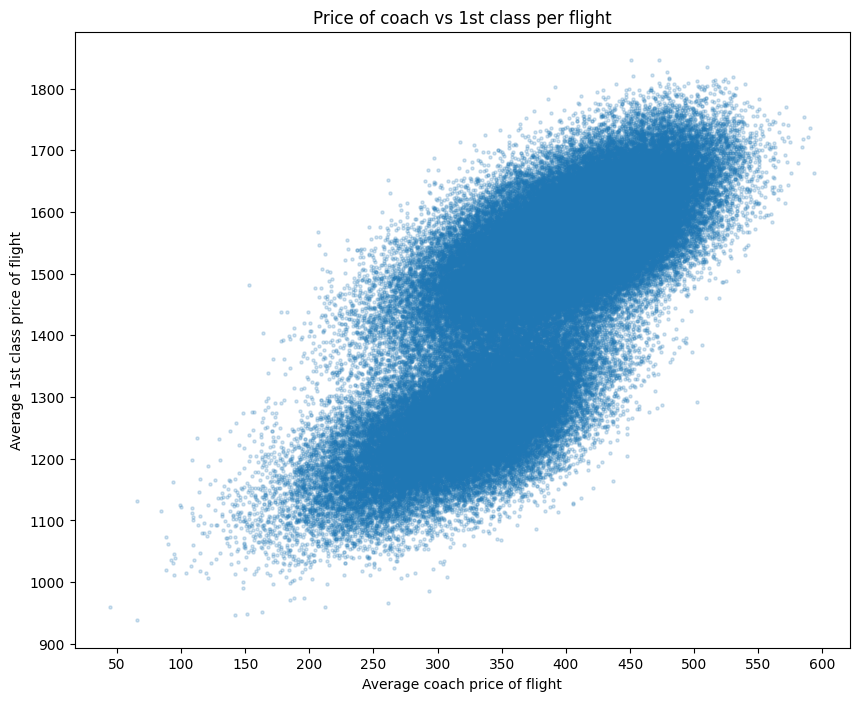

<Figure size 640x480 with 0 Axes>

In [40]:
## Task 4
plt.figure(figsize=(10, 8))
plt.scatter(x = flight.coach_price, y = flight.firstclass_price, s = 5, alpha=0.2)
y_ticks_val = [900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
plt.yticks(y_ticks_val)
x_ticks_val = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
plt.xticks(x_ticks_val)
plt.xlabel('Average coach price of flight')
plt.ylabel('Average 1st class price of flight')
plt.title('Price of coach vs 1st class per flight')
plt.show()
plt.clf()
# Positive correlation between cost price of coach and first class flights. Higher coach price == higher 1st class price.


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

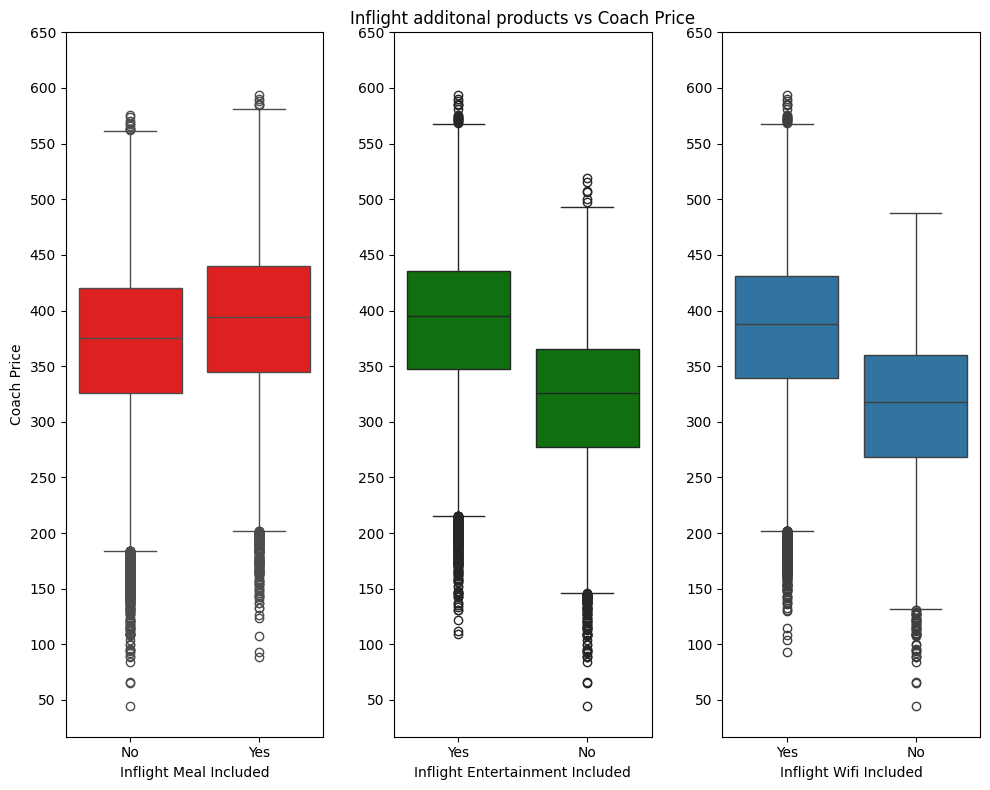

<Figure size 640x480 with 0 Axes>

In [34]:
## Task 5

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
sns.boxplot(x = flight.inflight_meal, y = flight.coach_price, color='red')
plt.ylabel('Coach Price')
plt.xlabel('Inflight Meal Included')
y_ticks_val = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
plt.yticks(y_ticks_val)
plt.subplot(1, 3, 2)
sns.boxplot(x = flight.inflight_entertainment, y = flight.coach_price, color='green')
plt.ylabel(' ')
plt.xlabel('Inflight Entertainment Included')
plt.title('Inflight additonal products vs Coach Price')
y_ticks_val = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
plt.yticks(y_ticks_val)
plt.subplot(1, 3, 3)
sns.boxplot(x = flight.inflight_wifi, y = flight.coach_price)
plt.ylabel(' ')
plt.xlabel('Inflight Wifi Included')
y_ticks_val = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
plt.yticks(y_ticks_val)
plt.tight_layout()
plt.show()
plt.clf()

# Yes there is a correlation between inflight entertainment and the price in coach, this being more prevelent for wifi and entertainment.

6. How does the number of passengers change in relation to the length of flights?

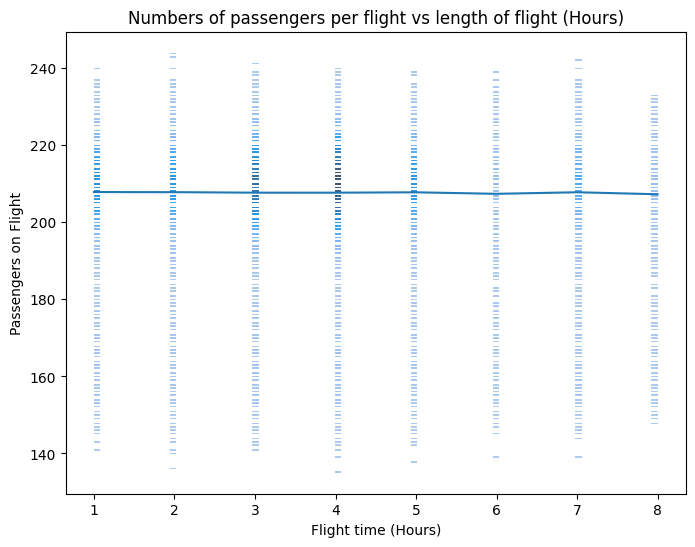

<Figure size 640x480 with 0 Axes>

In [31]:
## Task 6
plt.figure(figsize=(8, 6))
sns.histplot(x = flight.hours, y = flight.passengers)
plt.plot(flight.groupby('hours').passengers.mean())
plt.ylabel('Passengers on Flight')
plt.xlabel('Flight time (Hours)')
plt.title('Numbers of passengers per flight vs length of flight (Hours)')
plt.show()
plt.clf()
# Looking at the below plot, it is clear there is no correlation between length of flight and number of passengers

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

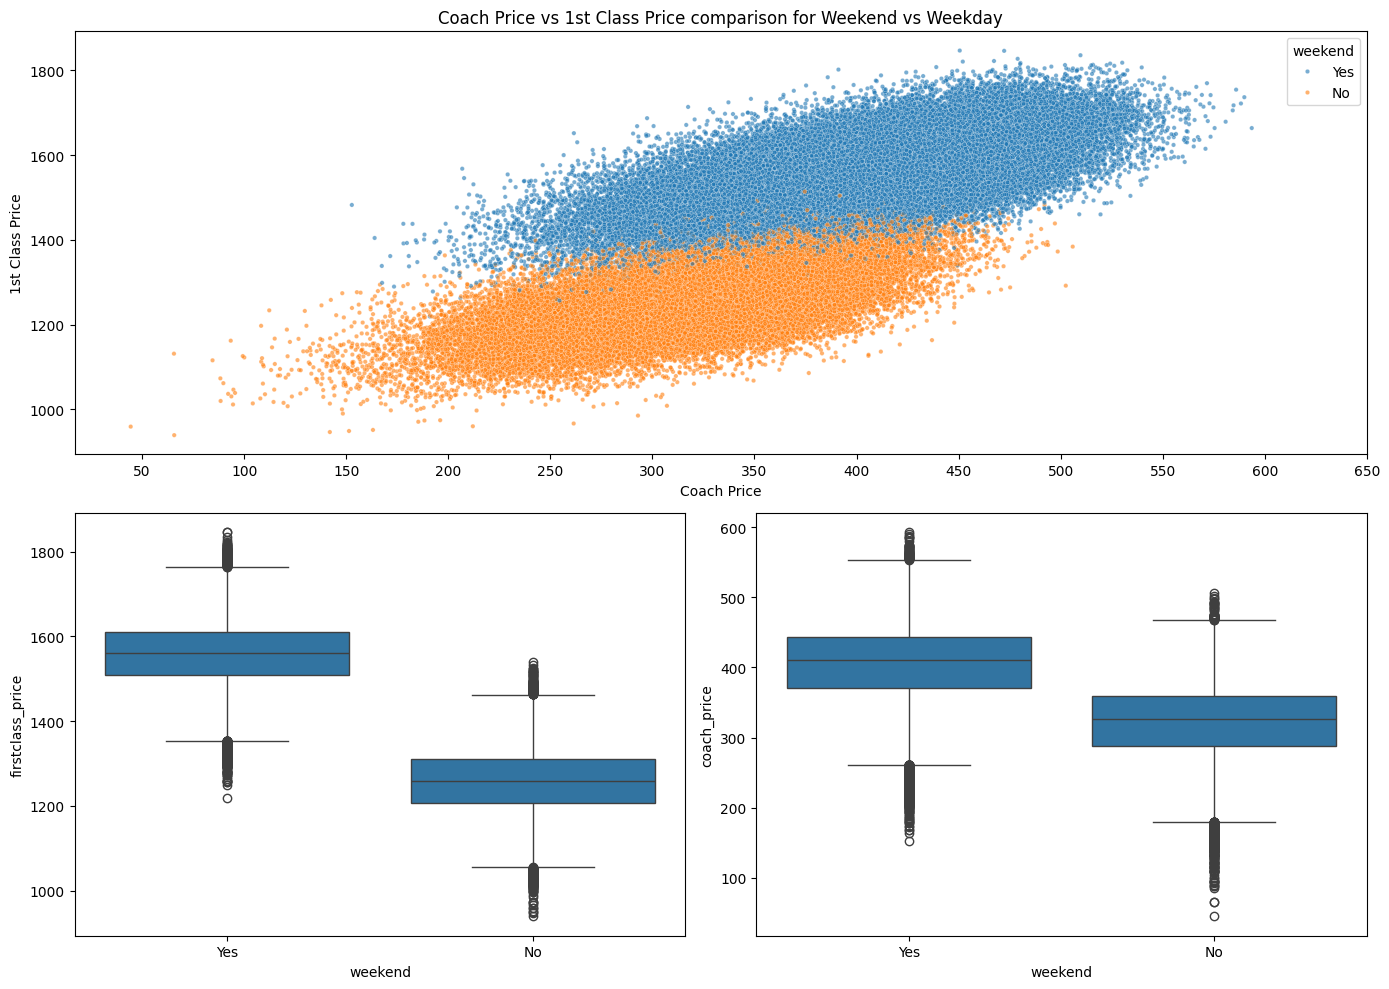

<Figure size 640x480 with 0 Axes>

In [43]:
## Task 7
plt.figure(figsize=(14, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
sns.scatterplot( x = flight.coach_price, y = flight.firstclass_price, hue=flight.weekend, s = 10, alpha=0.6)
x_ticks_val = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
plt.xticks(x_ticks_val)
plt.xlabel('Coach Price')
plt.ylabel('1st Class Price')
plt.title('Coach Price vs 1st Class Price comparison for Weekend vs Weekday')
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
sns.boxplot( x = flight.weekend, y = flight.firstclass_price)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
sns.boxplot( x = flight.weekend, y = flight.coach_price)

plt.tight_layout()
plt.show()
plt.clf()
# As per the below plot, there is a difference in cost between a weekend ticket and a weekday ticket for both 1st and second class

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

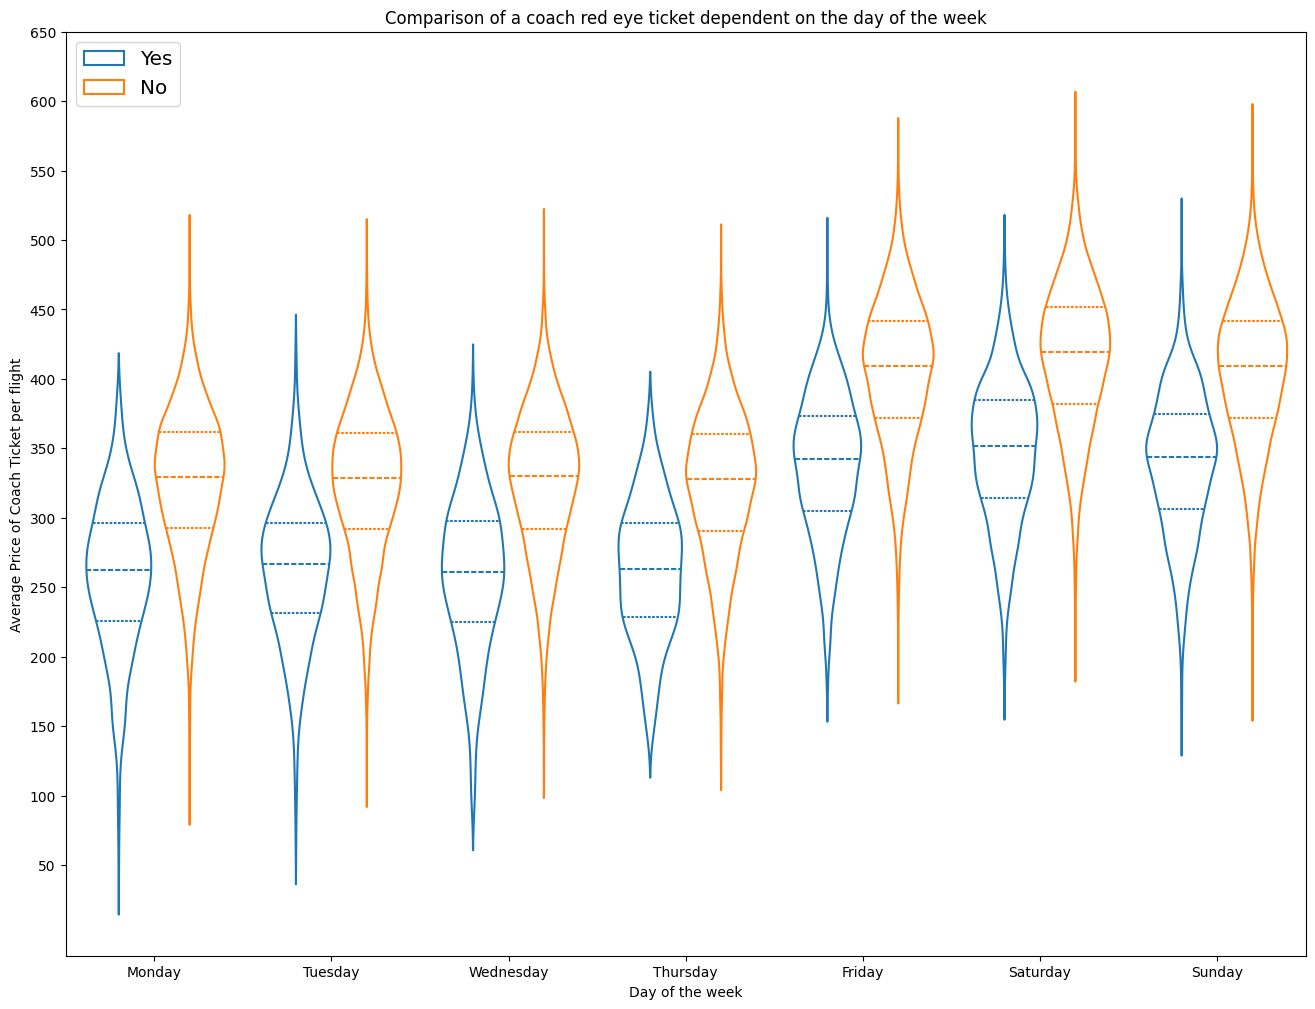

<Figure size 640x480 with 0 Axes>

In [50]:
## Task 8
ax = plt.figure(figsize=(16, 12))
sns.violinplot(x = flight.day_of_week, y=flight.coach_price, hue=flight.redeye, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill=False, inner='quart')
plt.legend(loc=2, fontsize='x-large')
plt.xlabel('Day of the week')
plt.ylabel('Average Price of Coach Ticket per flight')
plt.title('Comparison of a coach red eye ticket dependent on the day of the week')
y_ticks_val = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
plt.yticks(y_ticks_val)
plt.show()
plt.clf()

# In general, red eye prices are cheaper then non-redeye prices. The price of a ticket increases on a Friday,
# Saturday or Sunday compared to the rest of the week with a slight increase on a Saturday compared to the other 2 days
